## Hands-On Exploratory Data Analysis (EDA)

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

# Some configurations
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200) # Set maximum number of columns (for bigger datasets)

In [43]:
df = pd.read_csv('data/train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Data Understanding

- Dataframe Shape
- Head and Tail
- Data types
- Describe

In [44]:
df.shape

(8693, 14)

In [45]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [46]:
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [47]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [48]:
df.describe() # Show descriptive statistics about numeric variables by default
# df.info() # Alternative of the latter method

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## Data Preparation

- Dropping irrelevant columns and rows
- Identifying duplicated columns and missing values
- Renaming Columns
- Feature Creation

In [49]:
# Drop multiple columns
df = df.drop(columns=['PassengerId', 'Cabin'])

In [50]:
# Change dtype of columns
df[['CryoSleep', 'VIP']] = df[['CryoSleep', 'VIP']].astype(bool)

In [51]:
# Checking for missing values
df.isna().sum()

HomePlanet      201
CryoSleep         0
Destination     182
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [52]:
# Check for duplicates (Here we are dropping, but we could check this before dropping variables)
df = df.loc[~df.duplicated()].reset_index(drop=True)

In [53]:
df.shape

(8691, 12)

## Feature Understanding

Univariate Analysis (Distributions)
- Histograms
- KDE
- Boxplot

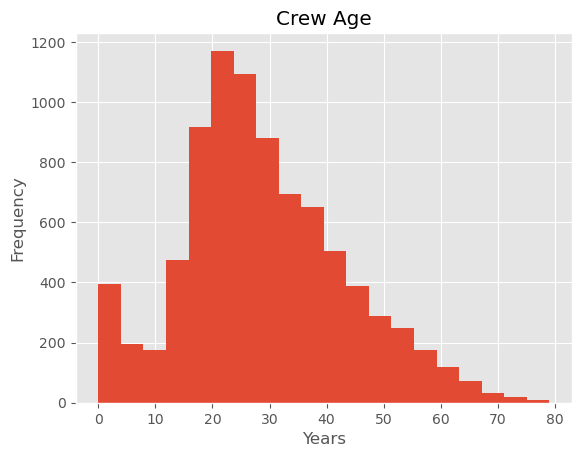

In [54]:
ax = df['Age'].plot(
    kind='hist',
    bins=20,
    title='Crew Age'
)
ax.set_xlabel('Years')
plt.show()

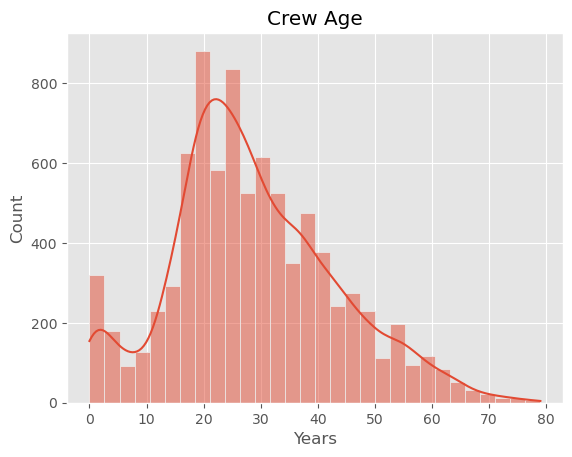

In [55]:
ax = sns.histplot(df, x='Age', bins=30, kde=True)
ax.set_title('Crew Age')
ax.set_xlabel('Years')
plt.show()

<Axes: xlabel='RoomService'>

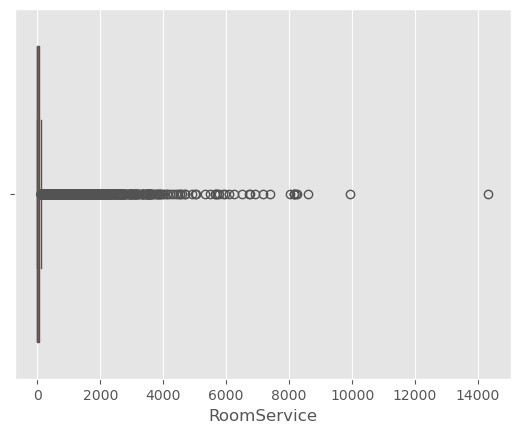

In [62]:
sns.boxplot(df, x='RoomService')

## Feature Relationships

Multivariate Analysis
- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby Comparisons

<Axes: xlabel='Age', ylabel='RoomService'>

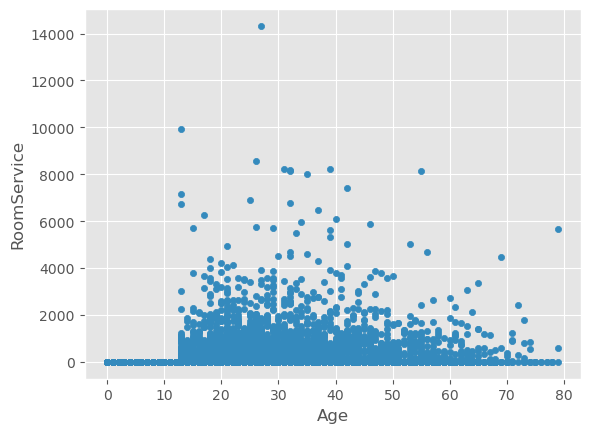

In [57]:
df.plot(
    kind='scatter',
    x='Age',
    y='RoomService',
)

<Axes: xlabel='Age', ylabel='RoomService'>

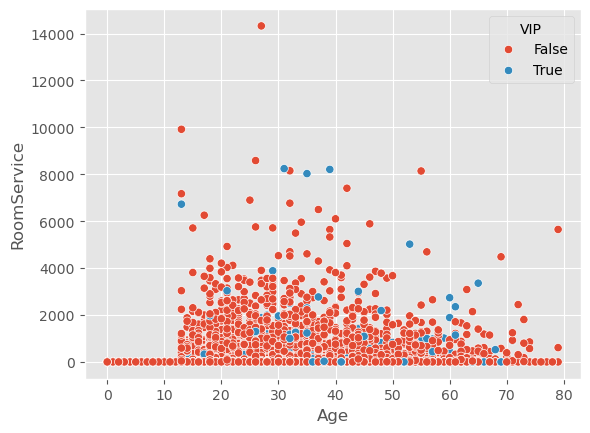

In [58]:
sns.scatterplot(df, x='Age', y='RoomService', hue='VIP')

In [59]:
numeric_cols = df.select_dtypes(include=np.number).columns

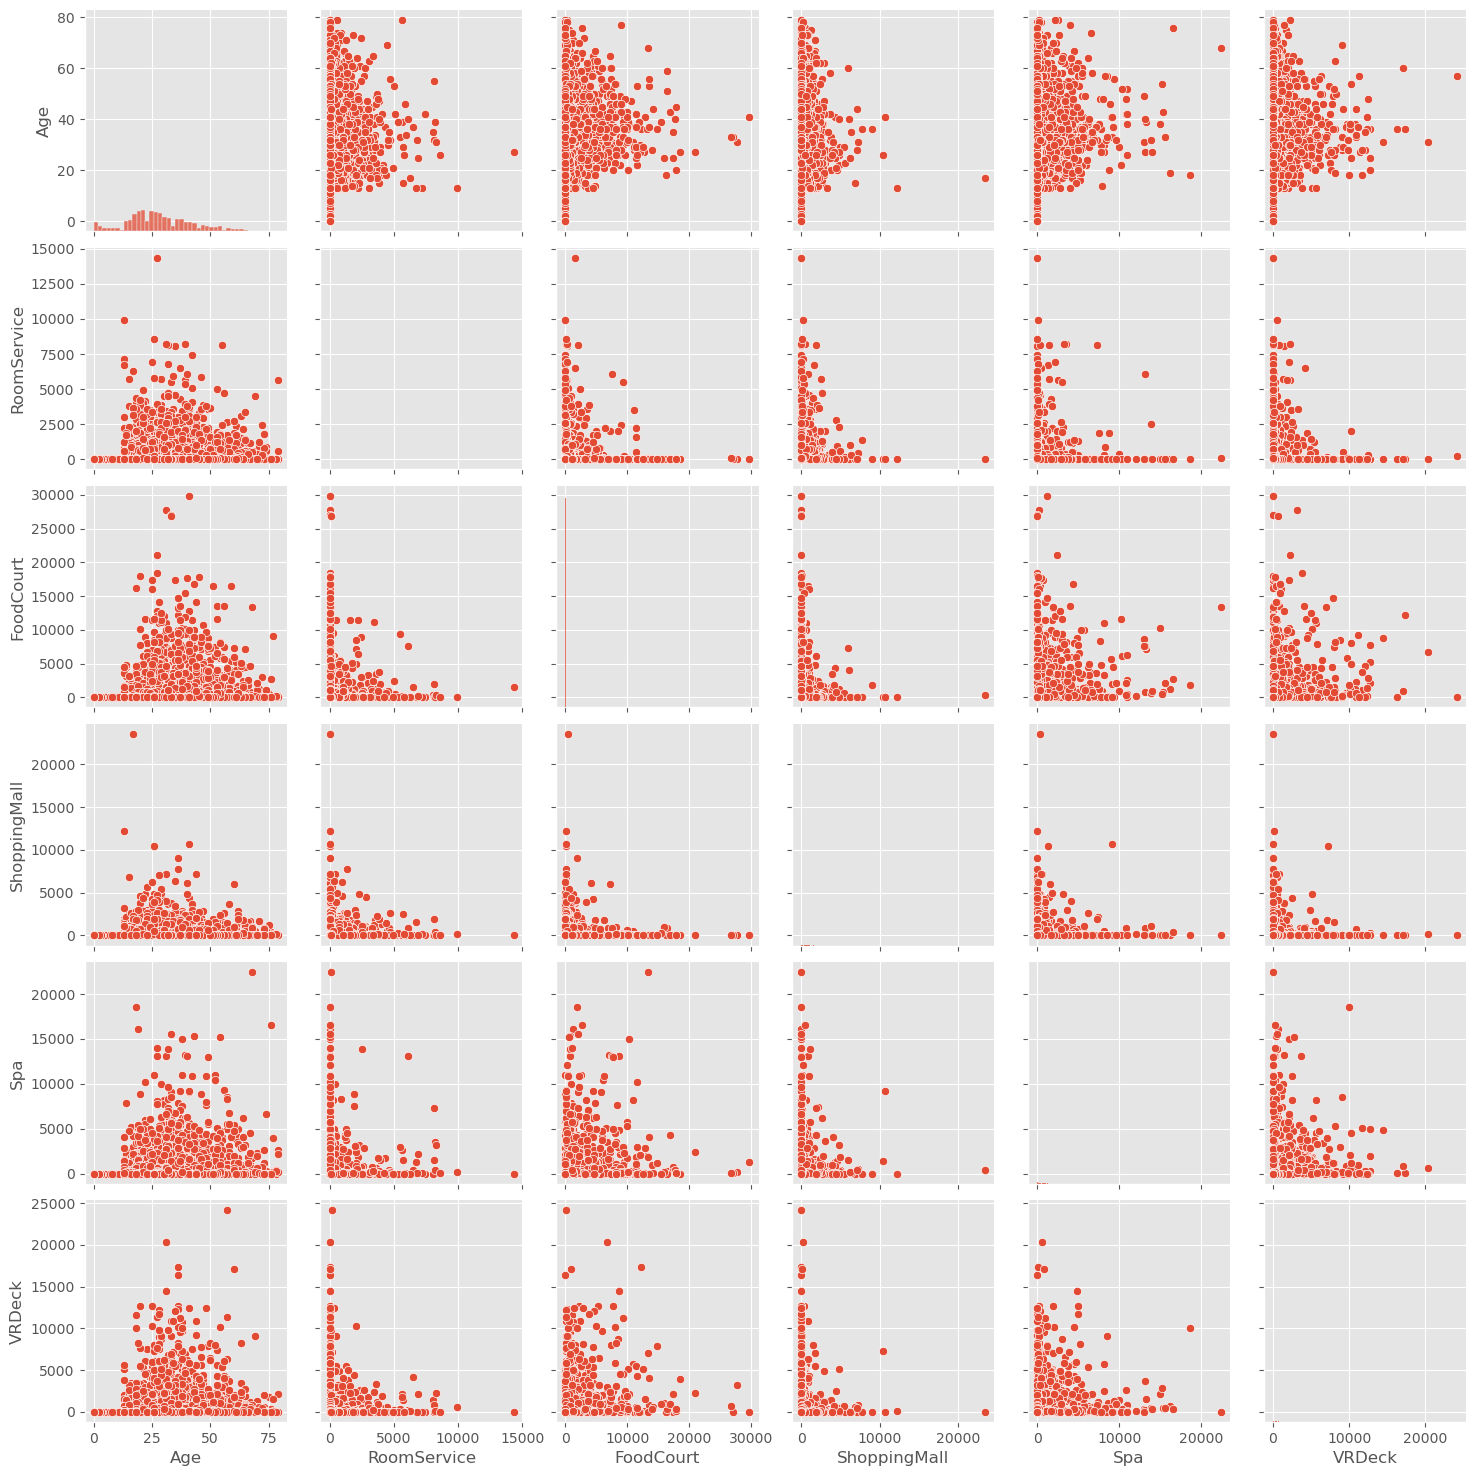

In [60]:
sns.pairplot(df, vars=numeric_cols)
plt.show()

In [64]:
# Check correlation between numeric variables
df_corr = df[numeric_cols].dropna().corr()
df_corr

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.067275,0.131933,0.032577,0.124010,0.103475
RoomService,0.067275,1.000000,-0.015685,0.054874,0.011627,-0.018894
FoodCourt,0.131933,-0.015685,1.000000,-0.013910,0.223245,0.224401
ShoppingMall,0.032577,0.054874,-0.013910,1.000000,0.014421,-0.004472
Spa,0.124010,0.011627,0.223245,0.014421,1.000000,0.144348
VRDeck,0.103475,-0.018894,0.224401,-0.004472,0.144348,1.000000


<Axes: >

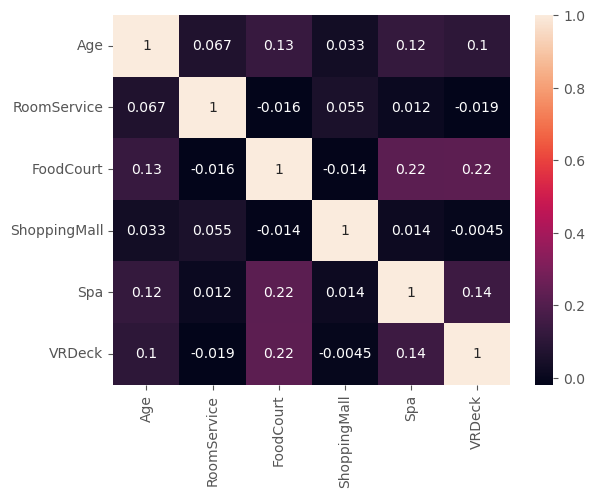

In [66]:
sns.heatmap(df_corr, annot=True)